<a href="https://colab.research.google.com/github/Esandu-Meth-Obadaarachchi/Predicting-income-of-employees/blob/main/FINAL_FILE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [25]:
# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Send a GET request to the URL
response = requests.get(url)

# Write the content of the response to a local file
with open("adult.data", "wb") as f:
    f.write(response.content)

# Load the dataset into a pandas DataFrame with specified column names
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                'hours-per-week', 'native-country', 'income']

df = pd.read_csv("adult.data",names=column_names)
df2 = df

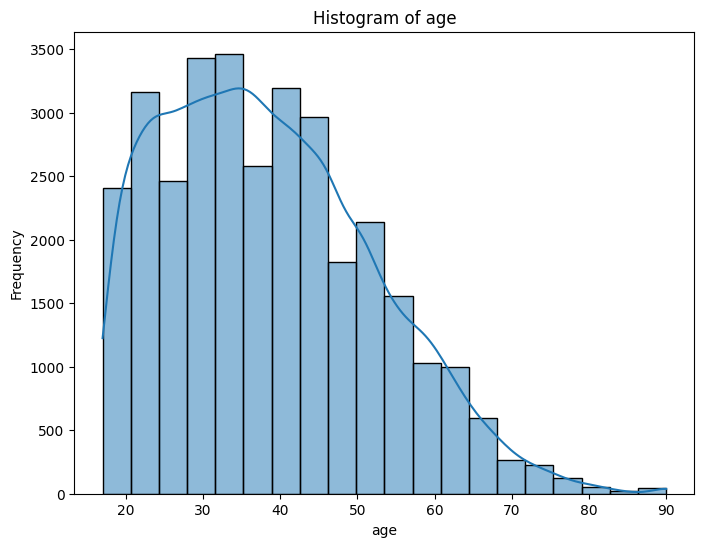

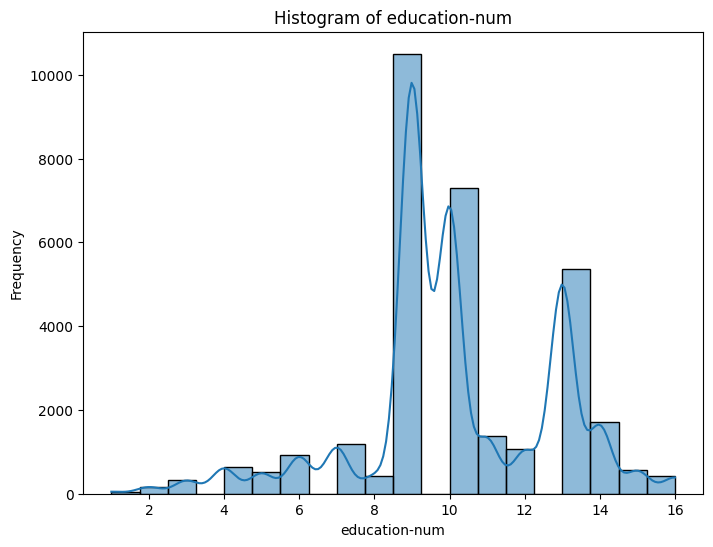

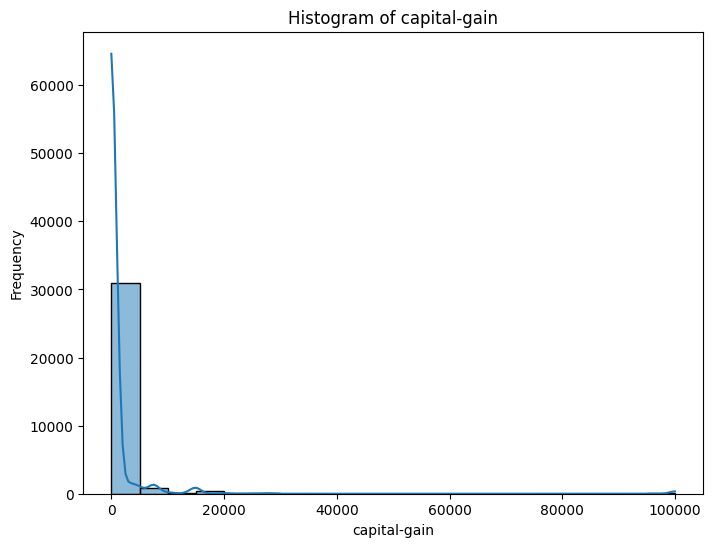

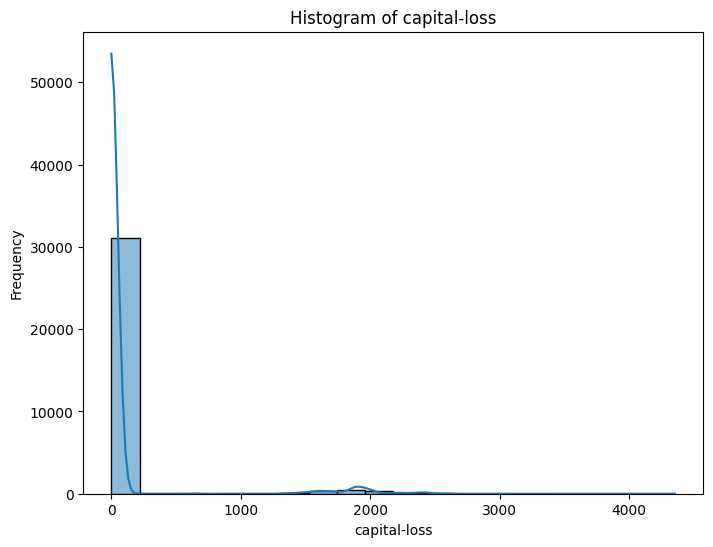

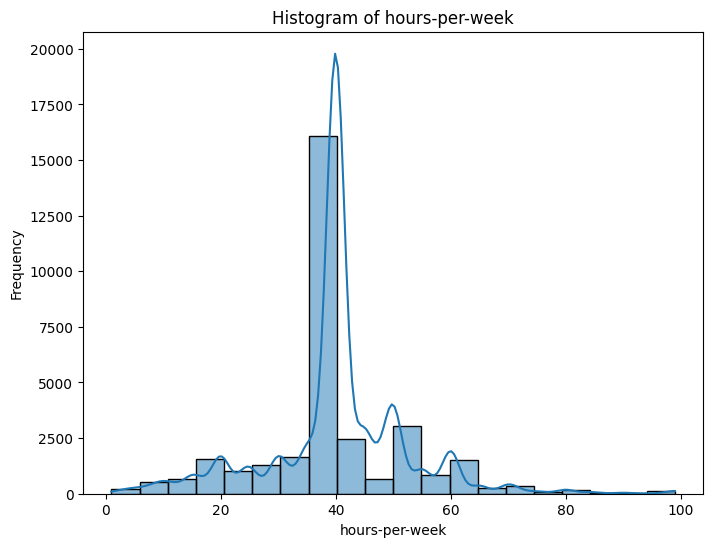

In [3]:
# Histograms for numerical features
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, bins=20, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

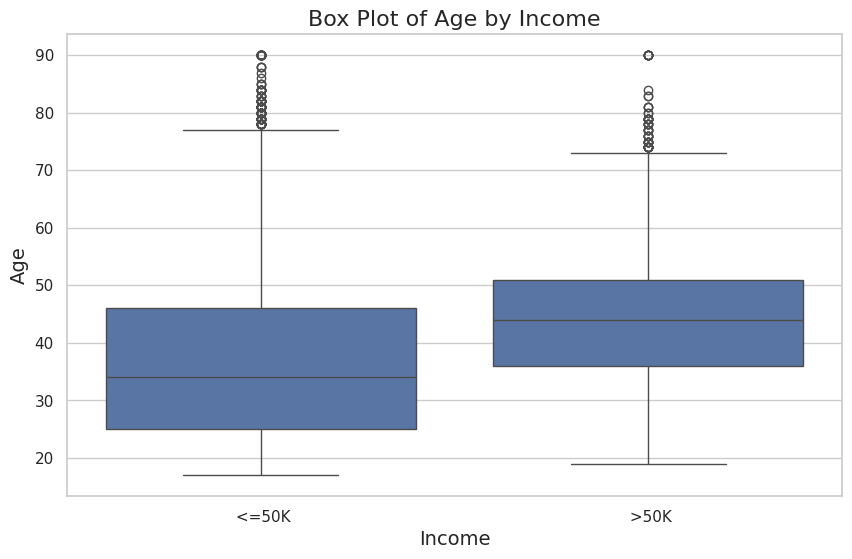

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plots
sns.set(style="whitegrid")

# Create the box plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(x='income', y='age', data=df)

# Set the labels and title
plt.xlabel('Income', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.title('Box Plot of Age by Income', fontsize=16)

# Show the plot
plt.show()

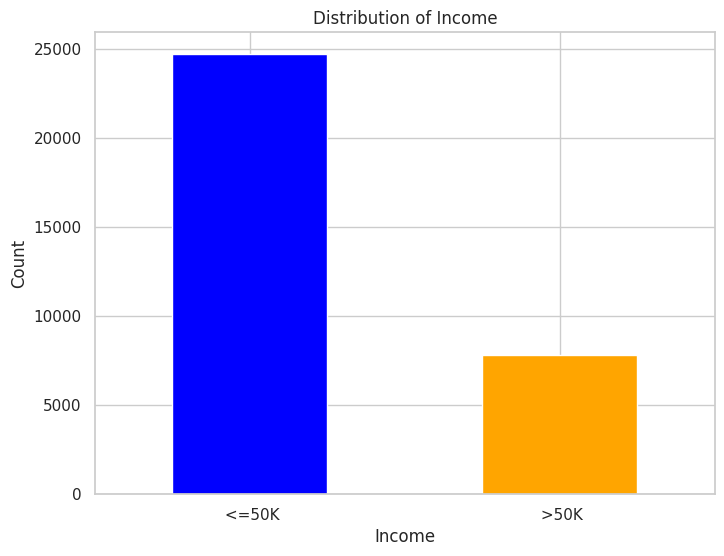

In [7]:
# Plot a box plot for the 'income' column
plt.figure(figsize=(8, 6))
df['income'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

<ipython-input-8-67cfef3e838b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


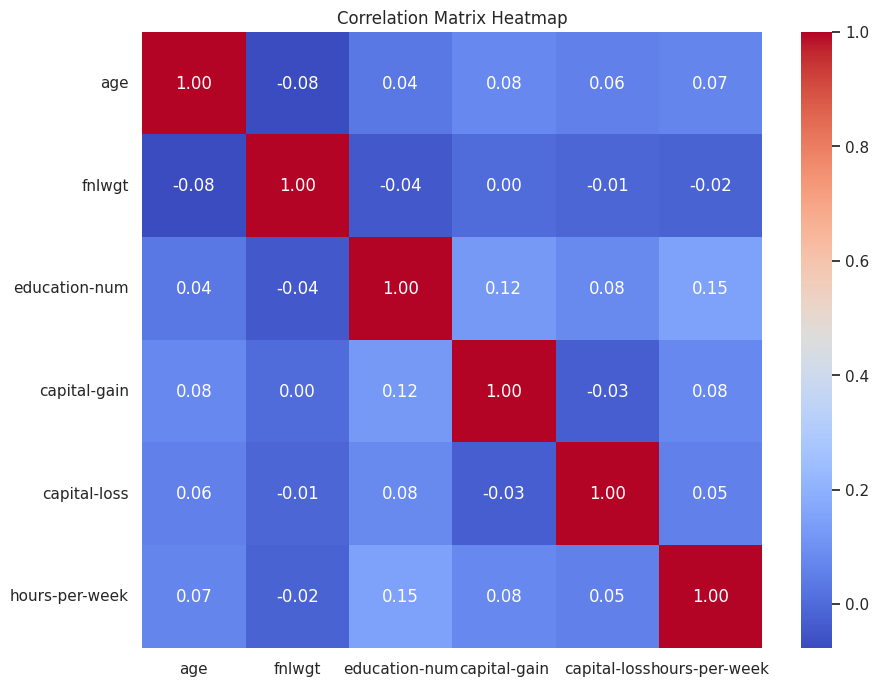

In [8]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

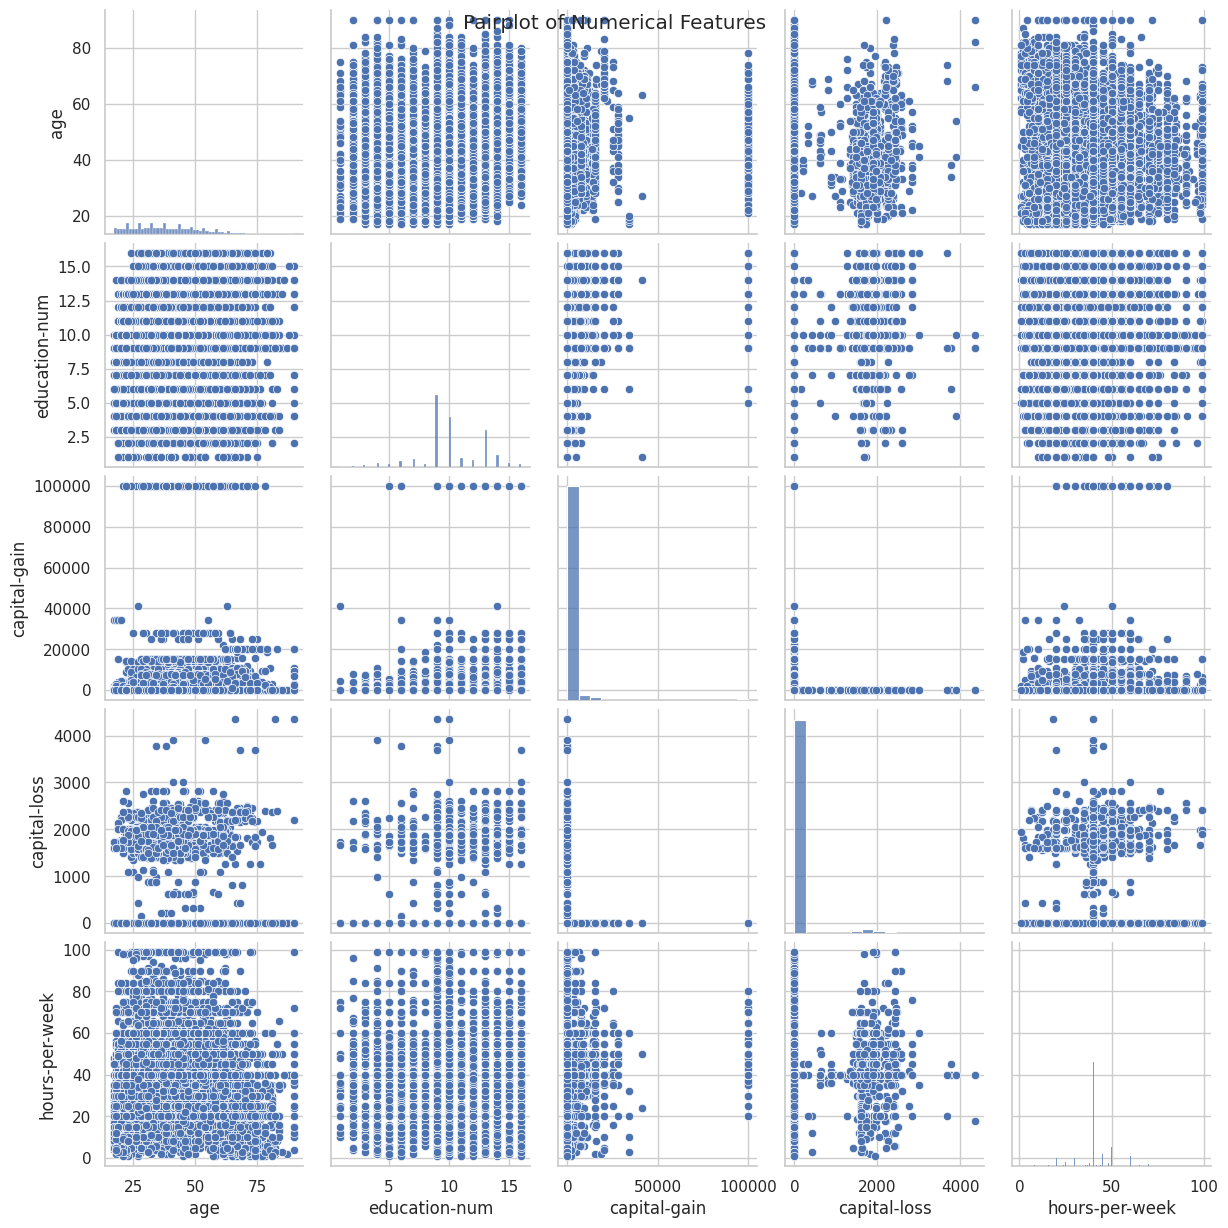

In [9]:
# Pairplot
sns.pairplot(df[numerical_features])
plt.suptitle('Pairplot of Numerical Features')
plt.show()

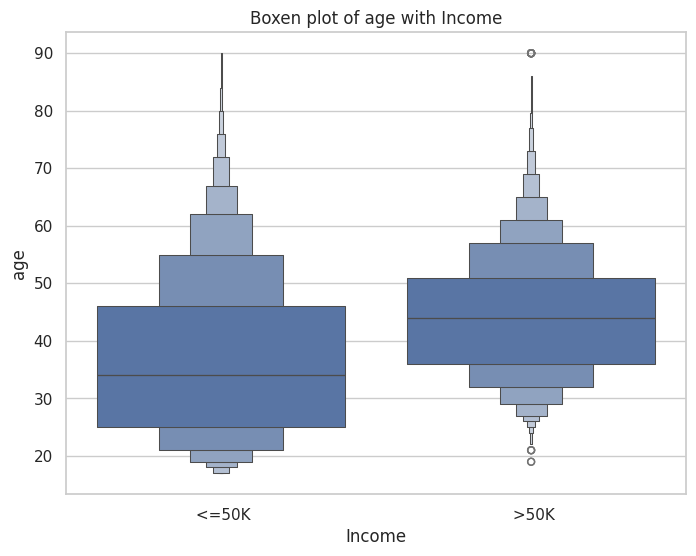

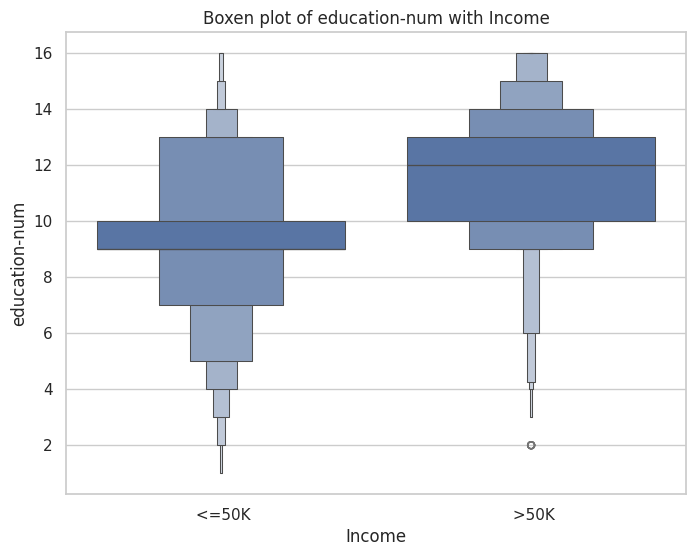

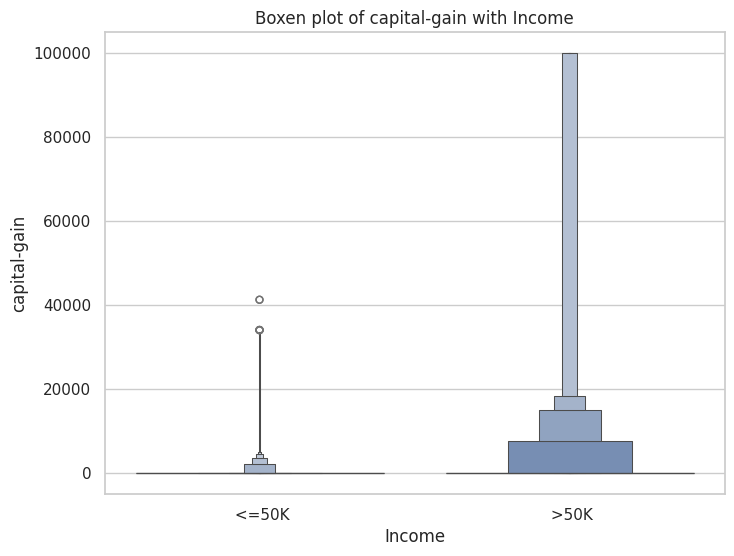

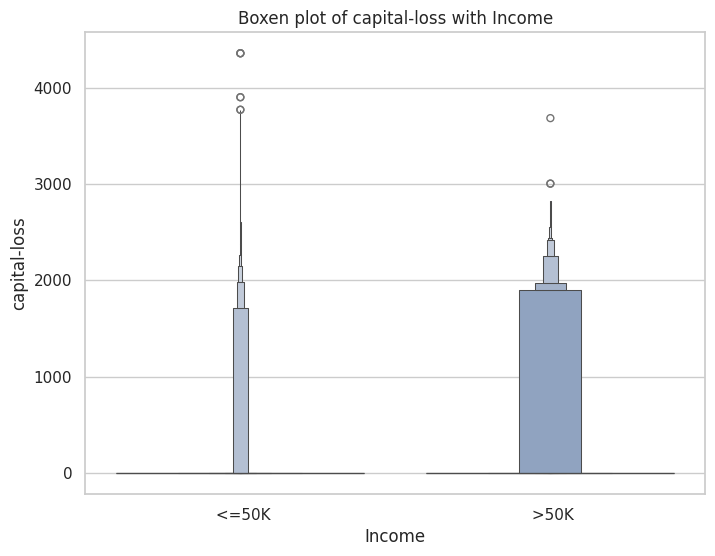

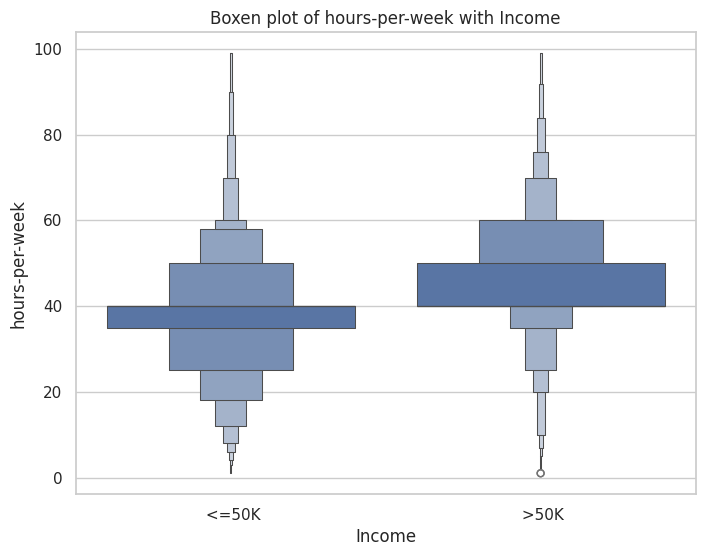

In [11]:
# Boxen plots
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxenplot(data=df, y=feature, x='income')
    plt.title(f'Boxen plot of {feature} with Income')
    plt.xlabel('Income')
    plt.ylabel(feature)
    plt.show()

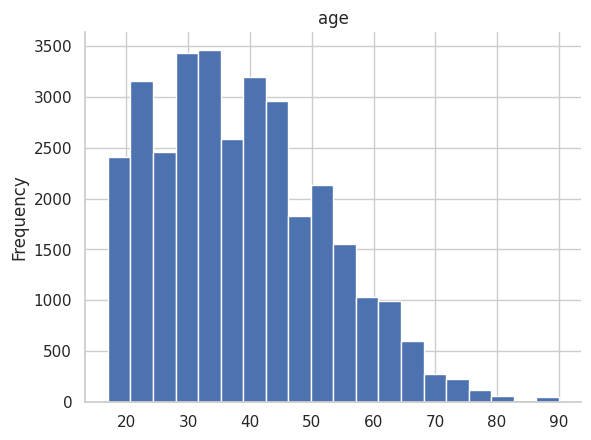

In [12]:
from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='age', ylabel='Count'>

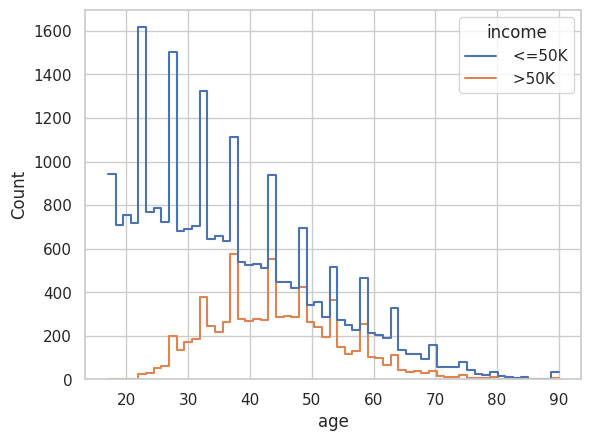

In [13]:
sns.histplot(data=df, x="age", hue="income", element="step", fill=False)

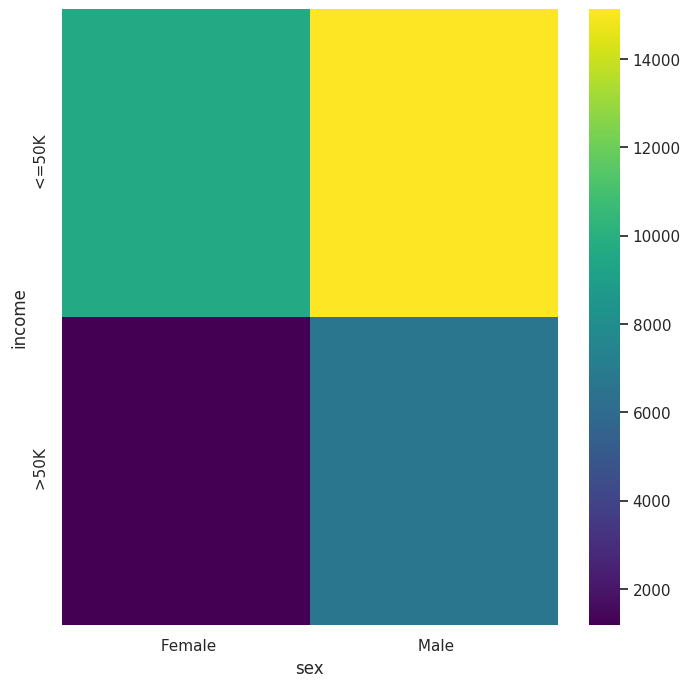

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['income'].value_counts()
    for x_label, grp in df.groupby('sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sex')
_ = plt.ylabel('income')

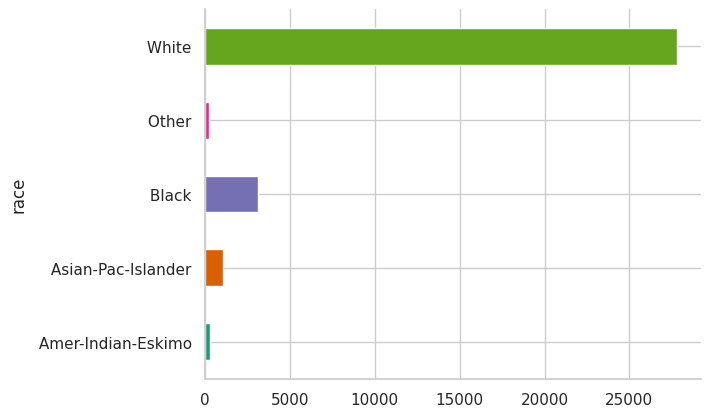

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('race').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

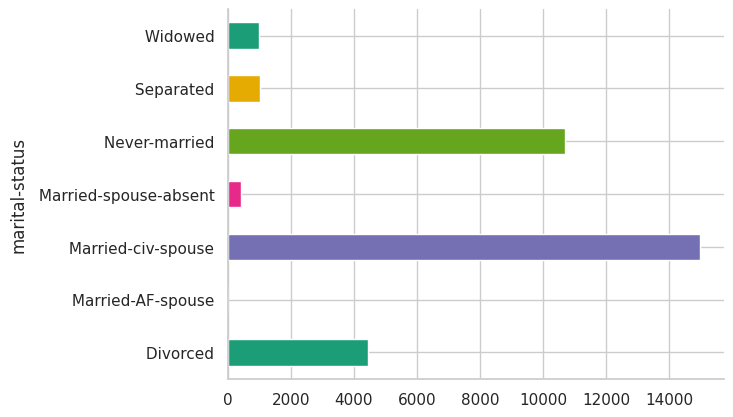

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('marital-status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

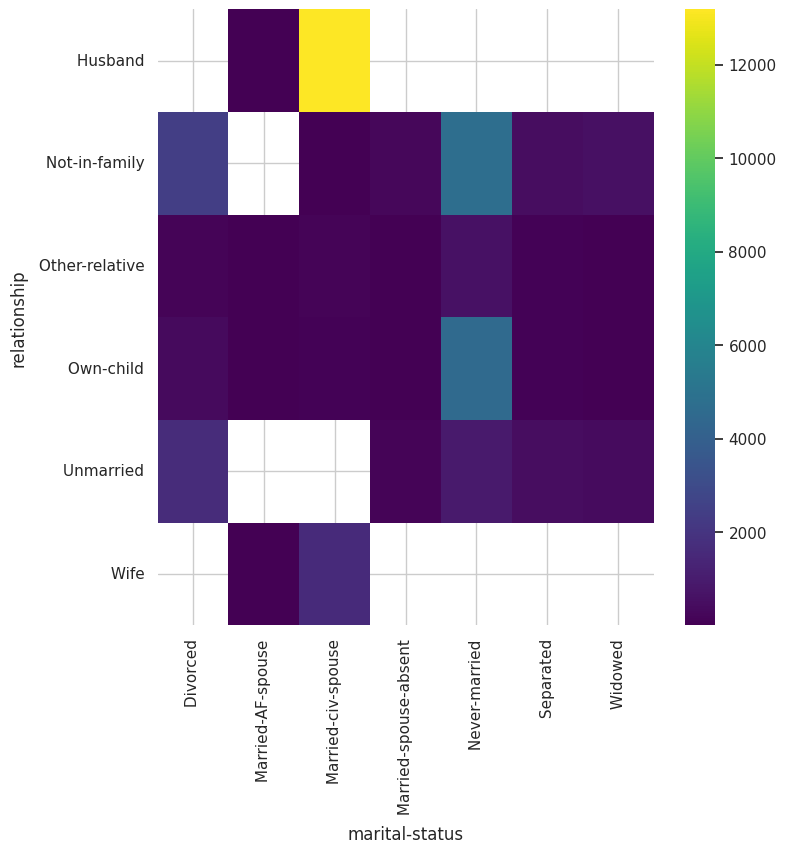

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['relationship'].value_counts()
    for x_label, grp in df.groupby('marital-status')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('marital-status')
_ = plt.ylabel('relationship')

# ***DATA PREPROCESSING***

# ***replacing the "?"***

In [19]:
# Iterate over each column and print unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print()

Unique values for column 'age':
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Unique values for column 'workclass':
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Unique values for column 'fnlwgt':
[ 77516  83311 215646 ...  34066  84661 257302]

Unique values for column 'education':
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Unique values for column 'education-num':
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique values for column 'marital-status':
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Unique

In [20]:
# Replace "?" values with the mode of each column
for column in df.columns:
    mode_value = df[column].mode()[0]  # Get the mode value of the column
    df[column].replace(" ?", mode_value, inplace=True)

# Now "?" values in all columns should be replaced with their respective modes

In [21]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# **Removing null values**

In [18]:
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [ ]:
workclass_mode = (df['workclass'].mode()).iloc[0]
occupation_mode = df['occupation'].mode().iloc[0]
nativecountry_mode = df['native-country'].mode().iloc[0]

In [ ]:
df['workclass'].fillna(value=workclass_mode, inplace=True)
df['occupation'].fillna(value=occupation_mode, inplace=True)
df['native-country'].fillna(value=nativecountry_mode, inplace=True)

In [ ]:
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

In [22]:
# Check for duplicates
duplicates = df[df.duplicated()]

# Print the duplicates
print("Duplicate rows:")
print(duplicates)

Duplicate rows:
       age          workclass  fnlwgt      education  education-num  \
4881    25            Private  308144      Bachelors             13   
5104    90            Private   52386   Some-college             10   
9171    21            Private  250051   Some-college             10   
11631   20            Private  107658   Some-college             10   
13084   25            Private  195994        1st-4th              2   
15059   21            Private  243368      Preschool              1   
17040   46            Private  173243        HS-grad              9   
18555   30            Private  144593        HS-grad              9   
18698   19            Private   97261        HS-grad              9   
21318   19            Private  138153   Some-college             10   
21490   19            Private  146679   Some-college             10   
21875   49            Private   31267        7th-8th              4   
22300   25            Private  195994        1st-4th         

In [ ]:
from scipy import stats

# Calculate Z-scores for numerical columns
z_scores = stats.zscore(df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])

# Define a threshold for outliers (e.g., Z-score > 3 or Z-score < -3)
threshold = 3

# Filter rows where any of the Z-scores exceed the threshold
outliers = df[(z_scores > threshold).any(axis=1)]

# Remove outliers from the DataFrame
df = df[(z_scores <= threshold).all(axis=1)]

In [27]:
# Print the column names of the DataFrame
print(df.columns)


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


# **One Hot Encoding**

In [35]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [36]:
to_encode = df.select_dtypes(include=['object']).columns
to_encode

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [37]:
drop_col = ['fnlwgt']

In [38]:
df = df.drop(columns=drop_col, axis=1)

# ***Converting >= and <= 50k into true and false***

In [39]:
# Replace values in the 'income' column with boolean values
df['income'] = df['income'].str.strip().replace({'<=50K': False, '>50K': True})

# Check the first few values in the 'income' column
print(df['income'].head())

0    False
1    False
2    False
3    False
4    False
Name: income, dtype: bool


In [40]:
df2 = df.income
df2.head()

0    False
1    False
2    False
3    False
4    False
Name: income, dtype: bool

# ***Implementation of the model***

In [41]:
# Extracting the target variable (y)
y = df2

X = df.drop(columns=['income'], axis=1)  # Drop the 'income' column along the columns axis (axis=1)

# Now, y contains the target variable ('income') and X contains all other columns as features

In [44]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# SelectKBest feature selection
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 7 features
X_numeric = df.select_dtypes(include=['int64'])  # Select only numeric features
selector.fit(X_numeric, df['income'])

# Get indices of the selected features
indices_selected = selector.get_support(indices=True)

# Get the names of selected features
selected_features = X_numeric.columns[indices_selected]

print("Best features:")
print(selected_features)

Best features:
Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [49]:
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)

In [51]:
grid_space={'max_depth':[3,5,10],
              'n_estimators':[10,100,200],
           }

In [52]:
from sklearn.model_selection import GridSearchCV

print('Running Grid Search...')
rf = RandomForestClassifier()


grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(X_train,y_train)

print('Done')

Running Grid Search...


ValueError: 
All the 27 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 345, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: ' Private'


In [ ]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))
best_max_depth_rf = model_grid.best_estimator_.max_depth
best_max_depth_rf
best_estimators_rf = model_grid.best_estimator_.n_estimators
best_estimators_rf

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'X' is not defined

In [32]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [33]:
# SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features based on ANOVA F-value
X_train_kbest = selector.fit_transform(X_train, y_train)
selected_features_kbest = X.columns[selector.get_support()]


NameError: name 'X_train' is not defined